In [8]:
import torch
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from src import *
imgsize = 512
num_classes = 5

In [9]:
classeID = {
    'crack': 0,
    'reticular crack': 1,
    'spalling': 2,
    'detachment': 3,
    'rebar': 4
}

classes = [ k for k in classeID.keys() ]



In [3]:
root_path = "/home/inchanji/nia23soc"

In [12]:
path2img = f"{root_path}/eda/res/{imgname}"
path2model = f"weights/cvt-13-224x224-512px-bs8-cosannealwarm-cEloss-3chimg-tta-best_metric.pth"
path2yaml = "configs/cvt-13-224x224.yaml"
path2csv = "/home/inchanji/aws/nia23soc_local/CvT/test.csv"


In [13]:
test = pd.read_csv(path2csv)
test.head()

,img_path,label
0,/home/inchanji/aws/nia23soc_local/1.원천데이터/지하시설...,0
1,/home/inchanji/aws/nia23soc_local/1.원천데이터/지하시설...,0
2,/home/inchanji/aws/nia23soc_local/1.원천데이터/지하시설...,0
3,/home/inchanji/aws/nia23soc_local/1.원천데이터/지하시설...,0
4,/home/inchanji/aws/nia23soc_local/1.원천데이터/지하시설...,1


In [24]:
model = build_model(path2yaml)
model.head = torch.nn.Linear(model.head.in_features, num_classes)
model.load_state_dict(torch.load(path2model))

<All keys matched successfully>

In [25]:
device = select_device("cuda:0")

label: 3


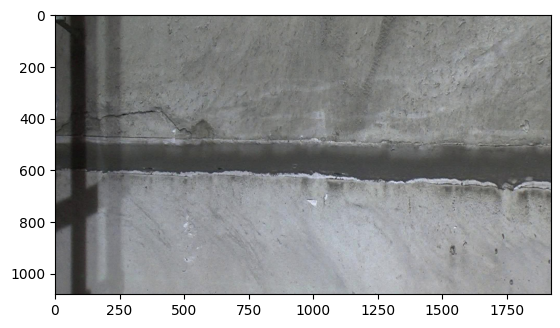

In [39]:
idx = 20
path2img = test['img_path'][idx]
label = test['label'][idx]
# show image 
img = cv2.imread(path2img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print("label:", label)

In [40]:
# Inference
img = cv2.imread(path2img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (imgsize, imgsize))

img = img.astype(np.float32) / 255.0 # 0 ~ 1
img = img - MEANPIXVAL
img = img / STDPIXVAL

img = img.transpose(2, 0, 1)
img = torch.tensor(img).unsqueeze(0)
img.shape

torch.Size([1, 3, 512, 512])

In [41]:
img = img.to(device).float()
model = model.to(device)

In [44]:

with torch.no_grad():
    model.eval()
    pred = model(img)
    print(pred)
    pred = torch.softmax(pred, dim = 0)
    pred = pred.cpu().numpy()
    pred = pred.squeeze()
    # pred = pred.argmax()

tensor([ 1.4383,  1.1730, -0.4358, -1.7480, -2.2079], device='cuda:0')


In [43]:
pred, classes[pred.argmax()]

(array([0.5030418 , 0.3858296 , 0.07721585, 0.02078846, 0.01312428],
       dtype=float32),
 'crack')